In [31]:
import voyageai
vo = voyageai.Client()
texts = [
    "That's one small step for man, one giant leap for mankind.",
    "It may seem small now, but it will help you in the future.",
    "Mr. Watson come here; I need you",
    "Hey kids, come help bring in the groceries",
    "When a thought of war comes, oppose it with a stronger thought of peace.",
    "Be nice today in school, even if people are mean to you.",
]
response = vo.embed(texts, model="voyage-2", input_type="document")
zipped = list(zip(texts, response.embeddings))

def dot_product(v1, v2):
    return sum([x * y for x, y in zip(v1, v2)])

In [32]:
print("Embeddings and dot product similarity rankings:")
for text, embedding in zipped:
    print()
    rounded = [round(x, 5) for x in embedding]
    left_4 = rounded[:4]
    print(f"{left_4}... {text}")
    similarities = []
    for other_text, other_embedding in zipped:
        if text != other_text:
            similarity = dot_product(embedding, other_embedding)
            similarities.append((other_text, similarity))
    similarities.sort(key=lambda x: x[1], reverse=True)
    for other_text, similarity in similarities[:3]:
        print(f"      {similarity:.5f} {other_text}")

Embeddings and dot product similarity rankings:

[-0.01632, 0.01311, 0.0456, 0.03741]... That's one small step for man, one giant leap for mankind.
      0.88270 It may seem small now, but it will help you in the future.
      0.84064 When a thought of war comes, oppose it with a stronger thought of peace.
      0.83687 Mr. Watson come here; I need you

[-0.02175, 0.03779, 0.00546, 0.02603]... It may seem small now, but it will help you in the future.
      0.88270 That's one small step for man, one giant leap for mankind.
      0.85134 Mr. Watson come here; I need you
      0.84143 Be nice today in school, even if people are mean to you.

[-0.02063, 0.03729, 0.0126, 0.02899]... Mr. Watson come here; I need you
      0.86319 Hey kids, come help bring in the groceries
      0.85134 It may seem small now, but it will help you in the future.
      0.83687 That's one small step for man, one giant leap for mankind.

[-0.03363, 0.0362, 0.00606, 0.0343]... Hey kids, come help bring in the gro

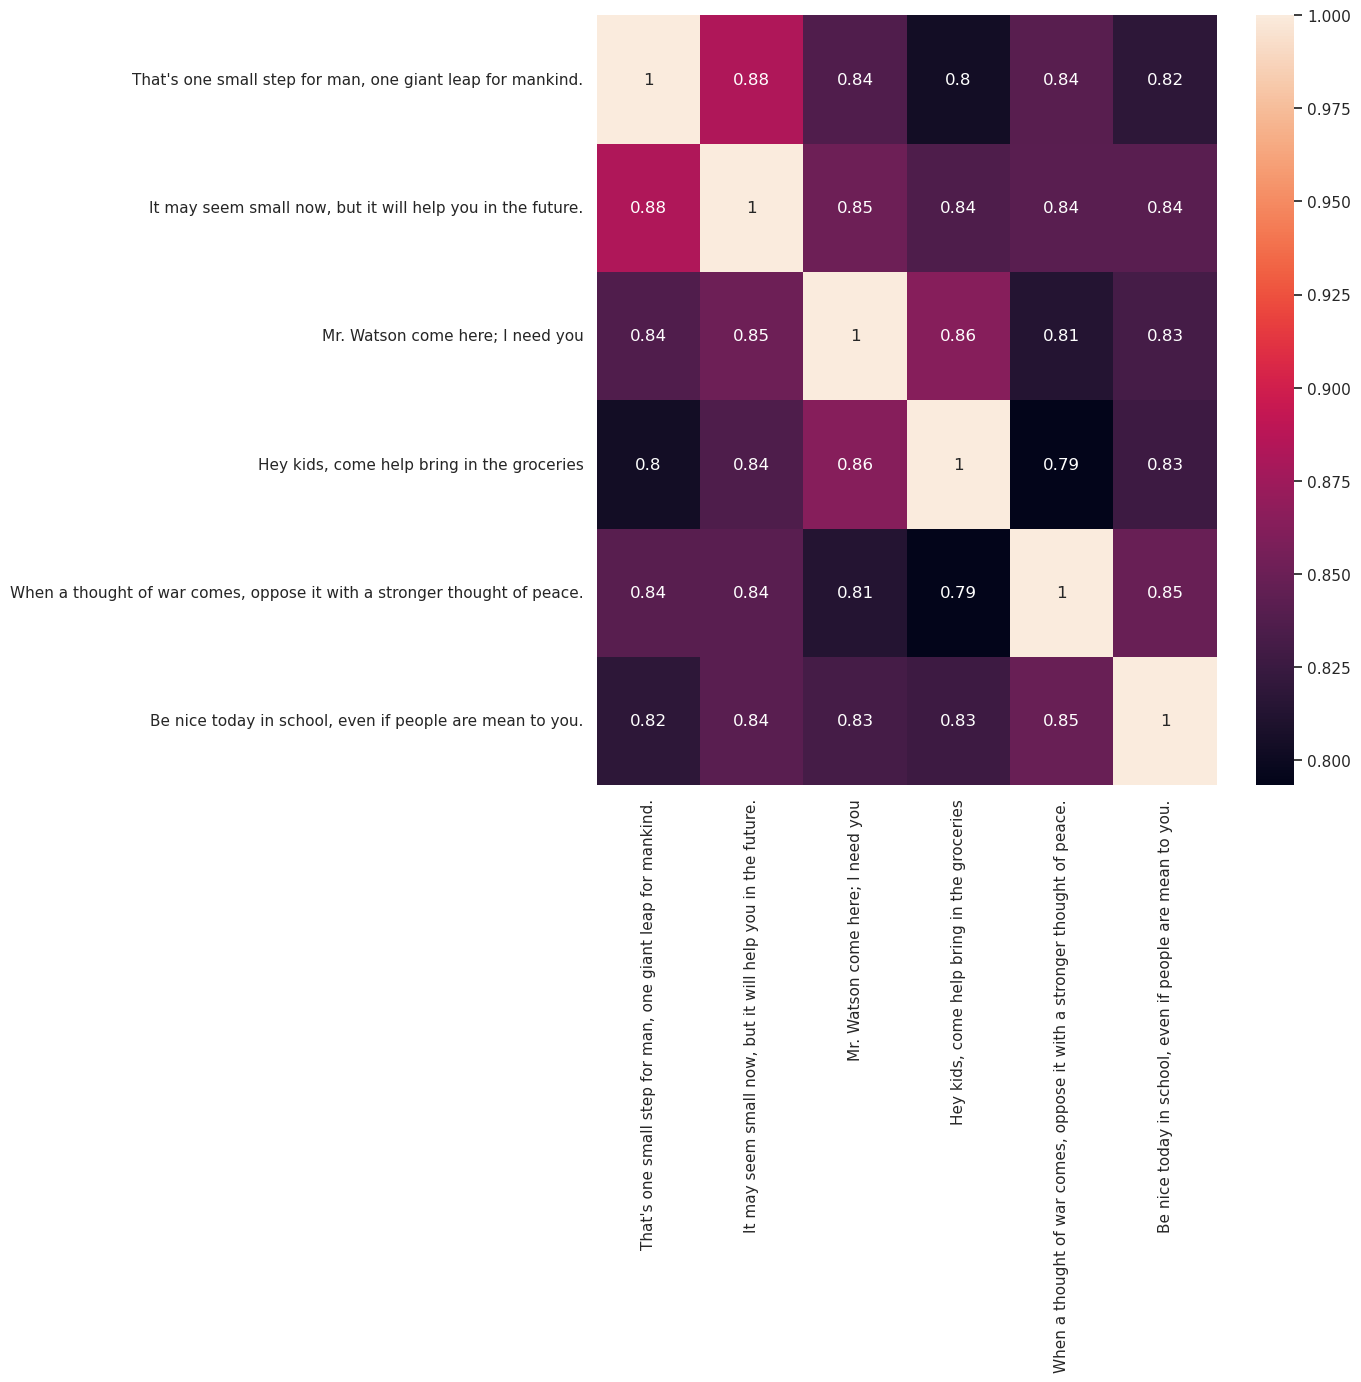

In [33]:
# graph similarities
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()
similarity_matrix = np.zeros((len(texts), len(texts)))
for i, (_, embedding) in enumerate(zipped):
    for j, (_, other_embedding) in enumerate(zipped):
        similarity_matrix[i, j] = dot_product(embedding, other_embedding)
plt.figure(figsize=(10, 10))
sns.heatmap(similarity_matrix, annot=True, xticklabels=texts, yticklabels=texts)
plt.show()